## Detection of correlated input to FS with and without gap junctions.

There are two population units for FS neurons, population unit 1 and population unit 2. In addition there are FS units without a population unit (0). The two population units receive cortical and thalamic input with 2Hz frequency. The correlation of population unit 1 is increased between 1 and 1.1 seconds for the cortical input, and between 2 and 2.1 seconds for the thalamic input.

In [1]:
import os
import numpy as np

os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example."

network_path = os.path.join("networks", "FS_correlation_detection")
rc = None

In [2]:
from snudda import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=12345)
si.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=50, num_LTS=0, num_ChIN=0)

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
# First test, we place units on top of each other -- set num_neurons to 8
si.add_population_unit_density(structure_name="Striatum", neuron_types=["FS"], unit_id=1, 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0, 100e-6, 0]),
                               probability_function="(d < 300e-6)*1", num_neurons=20)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["FS"], unit_id=2, 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0, 0, 100e-6]),
                               probability_function="(d < 300e-6) * 1", num_neurons=20)
 
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing networks/FS_correlation_detection/network-config.json


In [3]:
# Smaller network -- TESTING
if False:
    from snudda import SnuddaInit
    si = SnuddaInit(network_path=network_path, random_seed=12345)
    si.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=10, num_LTS=0, num_ChIN=0)

    # The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
    # First test, we place units on top of each other -- set num_neurons to 8
    si.add_population_unit_density(structure_name="Striatum", neuron_types=["FS"], unit_id=1, 
                                   unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0, 100e-6, 0]),
                                   probability_function="(d < 300e-6)*1", num_neurons=4)
    si.add_population_unit_density(structure_name="Striatum", neuron_types=["FS"], unit_id=2, 
                                   unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0, 0, 100e-6]),
                                   probability_function="(d < 300e-6) * 1", num_neurons=4)

    si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing networks/FS_correlation_detection/network-config.json


In [4]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

### Plotting the network
Plotting the network to verify that the population units are placed the way we expect.

Population unit 0 has 2 neurons
Population unit 1 has 4 neurons
Population unit 2 has 4 neurons


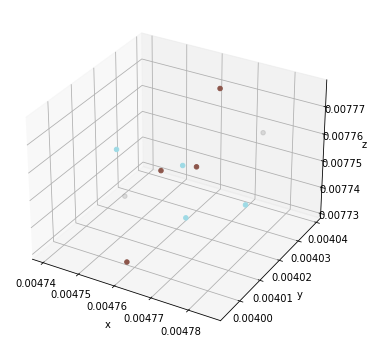

In [5]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations()

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

### Check if ipyparallel running
For larger networks it is useful to run network creation in parallel.

In [6]:
import os
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [7]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc, verbose=False)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 5/80 (10 neurons)
Processing hyper voxel : 29/80 (10 neurons)
Processing hyper voxel : 25/80 (10 neurons)
Processing hyper voxel : 24/80 (9 neurons)
Processing hyper voxel : 4/80 (8 neurons)
Processing hyper voxel : 9/80 (8 neurons)
Processing hyper voxel : 28/80 (7 neurons)
Processing hyper voxel : 21/80 (6 neurons)
Processing hyper voxel : 1/80 (5 neurons)
Processing hyper voxel : 20/80 (5 neurons)
Processing hyper voxel : 45/80 (4 neurons)
Processing hyper voxel : 8/80 (4 neurons)
Processing hyper voxel : 6/80 (3 neurons)
Processing hyper voxel : 0/80 (2 neurons)
Processing hyper voxel : 49/80 (2 neurons)
Processing hyper voxel : 48/80 (2 neurons)
Processing hyper voxel : 26/80 (2 neurons)
Processing hyper voxel : 13/80 (1 neurons)
Processing hyper voxel : 30/80 (1 neurons)
Processing hyper voxel : 32/80 (1 neurons)
Processing hyper voxel : 33/80 (1 neurons)
Processing hyper voxel : 44/80 (1 neurons)


In [8]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc, verbose=False)
sp.prune()

Read 2282 out of total 2282 synapses
Read 353 out of total 353 gapJunctions


### Generate input

Next we generate the input according to specifications in [FS-input-correlation-detection-1.json](FS-input-correlation-detection-1.json)

In [9]:
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("FS-input-correlation-detection-1.json"),
                 time=1.5,
                 rc=rc, verbose=False)
si.generate()

Loading 10 neurons with 279 synapses and 234 gap junctions
!!! Warning, combining definition of cortical input for neuron FS_1 0 (meta modified by input_config)
!!! Warning, combining definition of thalamic input for neuron FS_1 0 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron FS_0 1 (meta modified by input_config)
!!! Warning, combining definition of thalamic input for neuron FS_0 1 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron FS_3 2 (meta modified by input_config)
!!! Warning, combining definition of thalamic input for neuron FS_3 2 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron FS_3 3 (meta modified by input_config)
!!! Warning, combining definition of thalamic input for neuron FS_3 3 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron FS_2 4 (meta modified by input_config)
!!! Warning, combining 

### Plot the input to verify it looks reasonable

In [10]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

Loading 10 neurons with 279 synapses and 234 gap junctions


Input to FS population unit 1. Here we have a correlation increase in cortical input between 0.4 and 0.55 seconds, and in thalamic input between 1 and 1.15 seconds.

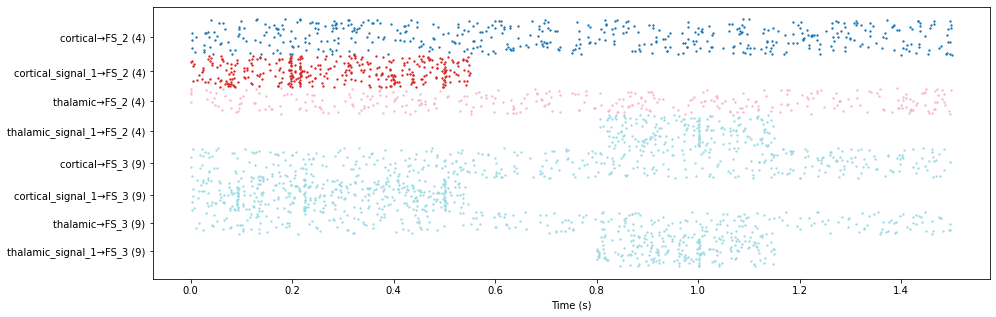

In [11]:
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="FS", fig_size=(15,5))

FS population unit 2 receives elevated input but no change in correlation.

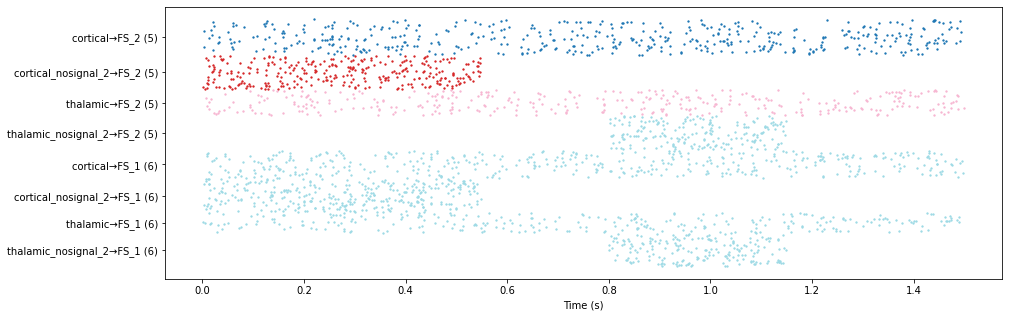

In [12]:
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="FS", fig_size=(15,5))

FS neurons without population unit receive the same low background input constantly.

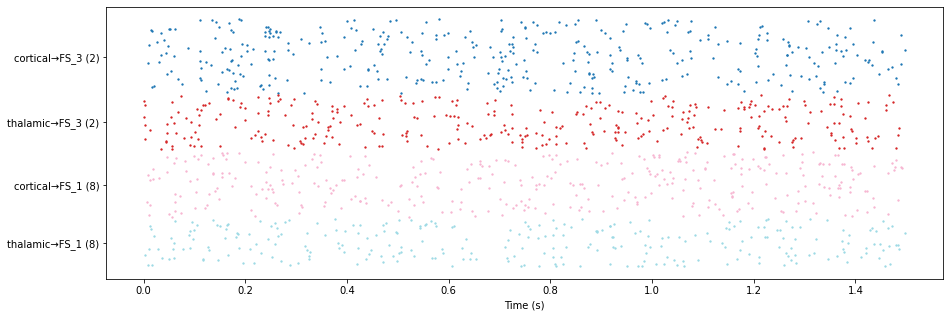

In [13]:
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="FS", fig_size=(15,5))

### Compile neuron modules

In [14]:
!nrnivmodl ../../../../BasalGangliaData/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data/neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/cal13_ms.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/cal_ch.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/caldyn_ms.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/can_fs.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/can_ms.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/cap_ch.mod" "../../../../BasalGangliaData/data/neurons/mechanisms/caq_fs.mod" "../

### Run the simulation

In [15]:
!mpiexec -n 3 snudda simulate networks/FS_correlation_detection --time 2

numprocs=3
Using input file networks/FS_correlation_detection/input-spikes.hdf5
Using input file networks/FS_correlation_detection/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file=None, path='networks/FS_correlation_detection', profile=False, randomseed=None, record_all=None, record_volt=True, time=2.0, verbose=False)
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, netw

In [16]:
!mpiexec -n 3 snudda simulate networks/FS_correlation_detection --time 2 --disableGJ --outputFile networks/FS_correlation_detection/simulation/output-no-GJ.hdf5

numprocs=3
Using input file networks/FS_correlation_detection/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=True, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='networks/FS_correlation_detection/simulation/output-no-GJ.hdf5', path='networks/FS_correlation_detection', profile=False, randomseed=None, record_all=None, record_volt=True, time=2.0, verbose=False)
!!! WE HAVE DISABLED GAP JUNCTIONS !!!
Using input file networks/FS_correlation_detection/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disa

Loading networks/FS_correlation_detection/simulation/output.hdf5


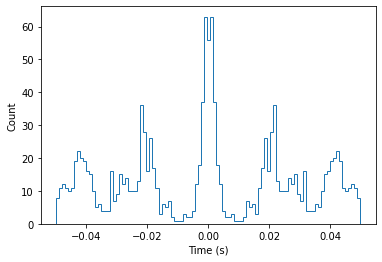

<Figure size 432x288 with 0 Axes>

In [17]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc1 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output.hdf5"))
pcc1.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr.png"))

Loading networks/FS_correlation_detection/simulation/output-no-GJ.hdf5


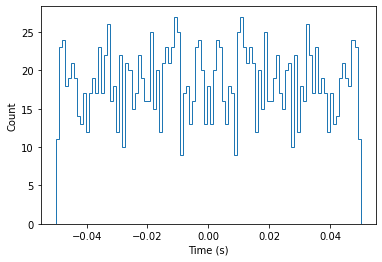

<Figure size 432x288 with 0 Axes>

In [18]:
pcc2 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-GJ.hdf5"))
pcc2.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj.png"))

### Plotting

We want to plot the binned frequency for the different populations as a function of time, to see if there is a difference in output frequency during 0.4-0.55 seconds and 1-1.15 seconds. 

Loading 10 neurons with 279 synapses and 234 gap junctions
Loading networks/FS_correlation_detection/simulation/output.hdf5
Saving figure to networks/FS_correlation_detection/figures/spike-raster-gj.pdf


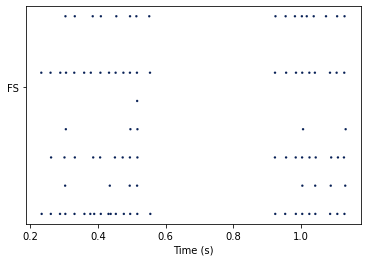

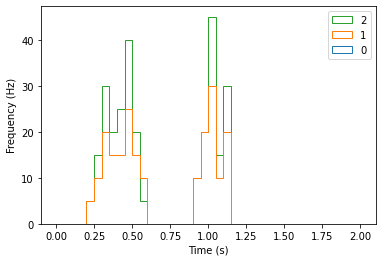

In [19]:
from snudda.plotting import SnuddaPlotSpikeRaster2
sim_file = os.path.join(network_path, "simulation", "output.hdf5")
fig_file = os.path.join(network_path, "figures", "spike-raster-gj.pdf")
spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file, figure_path=fig_file)
spr.plot_spike_raster()
spr.plot_spike_histogram()

Loading 10 neurons with 279 synapses and 234 gap junctions
Loading networks/FS_correlation_detection/simulation/output-no-GJ.hdf5
Saving figure to networks/FS_correlation_detection/figures/spike-raster-no-gj.pdf


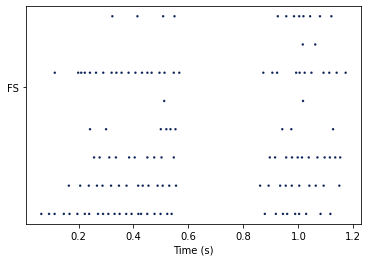

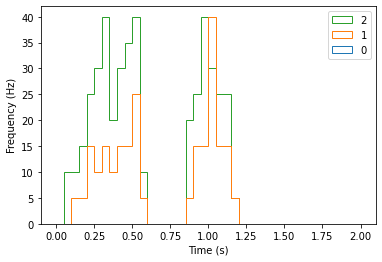

In [20]:
from snudda.plotting import SnuddaPlotSpikeRaster2
sim_file_no_gj = os.path.join(network_path, "simulation", "output-no-GJ.hdf5")
fig_file_no_gj = os.path.join(network_path, "figures", "spike-raster-no-gj.pdf")
spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_no_gj, figure_path=fig_file_no_gj)
spr2.plot_spike_raster()
spr2.plot_spike_histogram()